<a href="https://colab.research.google.com/github/daarisameen/Ml-DL-projects/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# End to End ML IITM: https://colab.research.google.com/drive/1leWpYtJrBhLf426Q2Emj1o3nNylPaJ0O?usp=sharing
# heart - https://media.licdn.com/dms/document/media/D4D1FAQFRlrkzgq8vMg/feedshare-document-pdf-analyzed/0/1696704666094?e=1698883200&v=beta&t=u-Ut36lewfXkDpX04b6MTvxFsTzVb4qkLu5AxKN4GcM
# taxi - https://media.licdn.com/dms/document/media/C4D1FAQEzUwZsEB0JLA/feedshare-document-pdf-analyzed/0/1679913090300?e=1698883200&v=beta&t=cuW5AsFBS9cZ-Va3hKcNItzeuI9Xq1xx5tx8ROQKkWY

# https://medium.com/@sthanikamsanthosh1994/context-aware-sentence-matching-using-ml-techniques-f93a28c4d1a1
# https://datascience.stackexchange.com/questions/75299/how-to-figure-out-if-two-sentences-have-the-same-meaning-with-ai
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/recommendation-systems/recommendation-systems.ipynb
# https://colab.research.google.com/github/mepky/movie-recommendation-system/blob/master/Movie_recommendation_engine.ipynb#scrollTo=H1Ta9vMPcsGW

# https://www.imdb.com/search/title/?num_votes=0,&countries=kr&primary_language=ko&view=advanced&sort=user_rating,desc&title_type=tv_series&sort=num_votes,desc&sort=moviemeter,asc
# https://www.imdb.com/search/title/?num_votes=0,&countries=jp&primary_language=ja&view=advanced&sort=user_rating,desc&title_type=tv_series&sort=num_votes,desc&genres=animation&sort=moviemeter,asc
# https://www.imdb.com/search/title/?num_votes=0,&view=advanced&sort=user_rating,desc&title_type=game&sort=num_votes,desc&sort=moviemeter,asc

In [242]:
import string
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Perceptron, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, jaccard_score

from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

import pickle

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


## CREATE THE DATA SET

In [219]:
import requests
from bs4 import BeautifulSoup
import csv

# Define the URL to scrape
urlf = "https://www.imdb.com/search/title/?title_type=tv_series&num_votes=0,&genres=animation&countries=jp&primary_language=ja&start="
page_no = 1
urle = "&ref_=adv_nxt"

# Create a CSV file to store the data
csv_file = open("anime_data.csv", mode="w", newline='', encoding="utf-8")
csv_writer = csv.writer(csv_file)

# Write the header row to the CSV file
csv_writer.writerow(["Rank", "Anime Name", "Release Year", "Genre", "Rating", "Votes", "Description", "Cast"])
rank=0
for i in range(1, 2900, 50):
    url = urlf + str(i) + urle

    # Send an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the elements containing anime data
        anime_items = soup.find_all('div', class_='lister-item-content')

        # Extract and write the data to the CSV file
        for idx, item in enumerate(anime_items):

            # Extract anime name
            anime_name = item.find('h3', class_='lister-item-header').a.text.strip()

            # Extract release year
            year_element = item.find('span', class_='lister-item-year')
            release_year = year_element.text.strip() if year_element else "N/A"

            # Extract genre as a list and remove elements with the value "Animation"
            genre_element = item.find('span', class_='genre')
            genre_list = genre_element.text.split(",") if genre_element else ["N/A"]
            genre_list = [genre.strip() for genre in genre_list]
            genre_list = [genre for genre in genre_list if genre != "Animation"]

            if not genre_list:
              genre_list = ["not decided"]

            # Extract rating
            rating_element = item.find('div', class_='inline-block ratings-imdb-rating')
            rating = rating_element.strong.text if rating_element else "N/A"

            # Extract number of votes
            votes_element = item.find('span', attrs={'name': 'nv'})
            votes = votes_element['data-value'] if votes_element else "N/A"

            # Extract description from the second 'text-muted' class
            description_element = item.find_all('p', class_='text-muted')[1]
            description = description_element.text.strip() if description_element else "N/A"

            # Extract cast names from elements with an empty class attribute
            cast_element = item.find('p', class_='')
            cast = cast_element.text.strip() if cast_element else "N/A"
            cast = [name.strip().replace("Stars:", "").strip() for name in cast.split(',')]

            # Calculate the rank as the index plus 1
            rank = rank + 1

            # Write the data to the CSV file
            csv_writer.writerow([rank, anime_name, release_year, ', '.join(genre_list), rating, votes, description, cast])
    else:
        print("Failed to retrieve the webpage. Status code:", response.status_code)

# Close the CSV file
csv_file.close()


1. Production name/Studio
2. Number of episodes and (released year)
3. Genre
4. (Plot)
5. Rating
6. Other famous anime produced by this studio
7. Please subscribe to this channel, my goal is to make my channel as No.1 anime channel in Youtube.

1. 10 Anime - If you loved "" (MUSIC).
2. center the name, put backgorund image, sub-pannels appear in anti clockwise direction.
3. Join my crew by subscribing - Monkey D Luffy.

I have a columns called
User_ratings, Movie_name, movie_description, genre, popularity_rank
write a ML code to train the model based on its description, user_rating, genre, and popularity_rank


just get the movie name from user and
and it is given that movie name will definitely present in the data set
Output should contain list of recommended movie_names

## LOAD THE DATA SET

In [220]:
data = pd.read_csv("anime_data.csv")
data[1:100]

,Rank,Anime Name,Release Year,Genre,Rating,Votes,Description,Cast
1,2,One Piece,(1999– ),"Action, Adventure",8.9,200307,Follows the adventures of Monkey D. Luffy and ...,"['Mayumi Tanaka', 'Akemi Okamura', 'Laurent Ve..."
2,3,Attack on Titan,(2013–2023),"Action, Adventure",9.0,446594,After his hometown is destroyed and his mother...,"['Josh Grelle', 'Bryce Papenbrook', 'Yûki Kaji..."
3,4,Demon Slayer: Kimetsu no Yaiba,(2019– ),"Action, Adventure",8.6,134969,A family is attacked by demons and only two me...,"['Natsuki Hanae', 'Zach Aguilar', 'Abby Trott'..."
4,5,Naruto: Shippuden,(2007–2017),"Action, Adventure",8.7,149326,"Naruto Uzumaki, is a loud, hyperactive, adoles...","['Alexandre Crepet', 'Junko Takeuchi', 'Maile ..."
5,6,Hunter x Hunter,(2011–2014),"Action, Adventure",9.0,122879,"Gon Freecss aspires to become a Hunter, an exc...","['Issei Futamata', 'Megumi Han', 'Cristina Val..."
...,...,...,...,...,...,...,...,...
95,96,Nana,(2006–2007),"Comedy, Drama",8.5,5115,"Two ostensibly opposite women, both named Nana...","['Romi Park', 'Kaori', 'Brian Drummond', 'Tosh..."
96,97,KILL la KILL,(2013–2014),"Action, Comedy",7.9,16131,A young girl arrives at a school of superhuman...,"['Ami Koshimizu', 'Aya Suzaki', 'Toshihiko Sek..."
97,98,Darling in the Franxx,(2018),"Action, Drama",7.3,12822,In a future world where humanity has been driv...,"['Yûto Uemura', 'Kana Ichinose', 'Nanami Yamas..."
98,99,Baki the Grappler,(2001–2007),"Action, Drama",7.5,2017,Baki Hanma competes in an underground fighting...,"['Bob Carter', 'Masami Kikuchi', 'Robert McCol..."


In [221]:
data.shape

(2900, 8)

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2900 non-null   int64  
 1   Anime Name    2900 non-null   object 
 2   Release Year  2900 non-null   object 
 3   Genre         2900 non-null   object 
 4   Rating        2900 non-null   float64
 5   Votes         2900 non-null   int64  
 6   Description   2900 non-null   object 
 7   Cast          2900 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 181.4+ KB


In [223]:
(data.isnull().sum())

Rank            0
Anime Name      0
Release Year    0
Genre           0
Rating          0
Votes           0
Description     0
Cast            0
dtype: int64

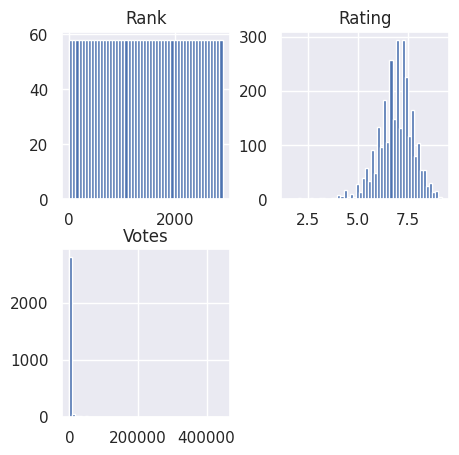

In [224]:
sns.set()
data.hist(bins=50,figsize=(5,5))
plt.show()

In [225]:
corr_matrix = data.copy().corr()
corr_matrix['Votes']

<ipython-input-225-3a72b1fd43b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.copy().corr()


Rank     -0.221509
Rating    0.214029
Votes     1.000000
Name: Votes, dtype: float64

<Axes: >

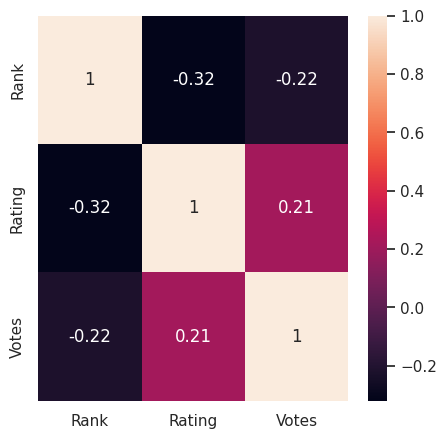

In [226]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)

In [227]:
temp = data.copy()
temp = temp.drop(['Rank'],axis=1)

temp.head()

,Anime Name,Release Year,Genre,Rating,Votes,Description,Cast
0,Jujutsu Kaisen,(2020– ),"Action, Adventure",8.6,88847,A boy swallows a cursed talisman - the finger ...,"['Junya Enoki', 'Yûichi Nakamura', 'Yuma Uchid..."
1,One Piece,(1999– ),"Action, Adventure",8.9,200307,Follows the adventures of Monkey D. Luffy and ...,"['Mayumi Tanaka', 'Akemi Okamura', 'Laurent Ve..."
2,Attack on Titan,(2013–2023),"Action, Adventure",9.0,446594,After his hometown is destroyed and his mother...,"['Josh Grelle', 'Bryce Papenbrook', 'Yûki Kaji..."
3,Demon Slayer: Kimetsu no Yaiba,(2019– ),"Action, Adventure",8.6,134969,A family is attacked by demons and only two me...,"['Natsuki Hanae', 'Zach Aguilar', 'Abby Trott'..."
4,Naruto: Shippuden,(2007–2017),"Action, Adventure",8.7,149326,"Naruto Uzumaki, is a loud, hyperactive, adoles...","['Alexandre Crepet', 'Junko Takeuchi', 'Maile ..."


In [228]:
temp.describe()

,Rating,Votes
count,2900.000000,2900.000000
mean,6.892759,2165.238621
std,0.908434,14849.548362
min,1.500000,5.000000
25%,6.400000,45.000000
50%,7.000000,143.000000
75%,7.500000,604.250000
max,9.200000,446594.000000


In [229]:
print(data['Votes'].value_counts())
print(" ")
print(data['Genre'].value_counts())
print(" ")
print(data['Rating'].value_counts())
print(" ")

12      29
11      27
19      26
8       25
30      25
        ..
2550     1
1666     1
1990     1
1581     1
355      1
Name: Votes, Length: 1134, dtype: int64
 
Action, Adventure       535
Comedy, Drama           247
not decided             219
Action, Comedy          206
Comedy                  140
                       ... 
Crime, Fantasy            1
Adventure, Biography      1
Music, Musical            1
Short, Romance            1
Biography, Comedy         1
Name: Genre, Length: 110, dtype: int64
 
7.0    166
7.2    160
6.8    147
6.6    136
7.3    133
      ... 
2.9      1
1.5      1
1.7      1
9.2      1
3.6      1
Name: Rating, Length: 67, dtype: int64
 


In [230]:
temp.shape

(2900, 7)

In [231]:
nltk.download('stopwords')
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove common English stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    return text

temp['Description'] = temp['Description'].apply(preprocess_text)
temp['Description']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       boy swallows cursed talisman finger demon beco...
1       follows adventures monkey luffy pirate crew or...
2       hometown destroyed mother killed young eren ja...
3       family attacked demons two members survive tan...
4       naruto uzumaki loud hyperactive adolescent nin...
                              ...                        
2895                                             add plot
2896    appearance convenience store clerk talk proper...
2897                                             add plot
2898                                             add plot
2899    story follows everyday life somera nonomoto us...
Name: Description, Length: 2900, dtype: object

In [232]:
# temp = pd.get_dummies(temp, columns= ['Genre'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(temp.head(11))

In [251]:
def cossine(input_anime, n=50):
    # Load the anime data from a CSV file
    df = temp

    # Check if the input anime is in the dataset
    if input_anime not in df['Anime Name'].values:
        return "Anime not found in the dataset"

    # Initialize the TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Fit and transform the descriptions to TF-IDF vectors
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Description'])

    # Get the index of the input anime
    input_index = df[df['Anime Name'] == input_anime].index[0]

    # Calculate cosine similarities between input anime and all other anime
    cosine_similarities = linear_kernel(tfidf_matrix[input_index], tfidf_matrix).flatten()

    # Get the indices of the top-n most similar anime
    similar_indices = cosine_similarities.argsort()[:-n-1:-1]

    return similar_indices[1:]

# Example usage

input_anime_name = "One Piece"  # Replace with the anime name you want recommendations for
indices= cossine(input_anime_name, n=50)


In [252]:
data.iloc[indices].sort_values(by=['Rank', 'Rating'], ascending=[True, False])[:10]

,Rank,Anime Name,Release Year,Genre,Rating,Votes,Description,Cast
119,120,Kingdom,(2012– ),"Action, Drama",8.5,2826,"In ancient China, a young boy dreams of becomi...","['Masakazu Morita', 'Jun Fukuyama', 'Rie Kugim..."
162,163,Golden Kamuy,(2018– ),"Action, Adventure",8.1,2284,"In the early 20th century in Hokkaido, Japan, ...","['Chikahiro Kobayashi', 'Haruka Shiraishi', 'F..."
366,367,Planetes,(2003–2004),"Drama, Sci-Fi",8.1,3832,Ai Tanabe joins the Debris Section of the Tech...,"['Kazunari Tanaka', 'Satsuki Yukino', 'Ai Orik..."
388,389,Heidi: A Girl of the Alps,(1974),"Adventure, Comedy",7.5,5808,"This animation series follows the childhood ""a...","['Vic Perrin', 'Randi Kiger', 'Kazuko Sugiyama..."
390,391,Outlaw Star,(1998–2001),"Action, Adventure",7.9,4040,The adventures of an outlaw crew of an advance...,"['Ayako Kawasumi', 'Bob Buchholz', 'Bridget Ho..."
504,505,Yu-Gi-Oh! Zexal,(2011–2014),"Action, Comedy",5.3,1085,Yuma Tsukumo must team up with an ethereal bei...,"['Alexandre Crepet', 'Marc Thompson', 'Sean Sc..."
544,545,Talentless Nana,(2020),"Action, Fantasy",7.0,1128,A group of super-powered children are gathered...,"['Rumi Okubo', 'Yûichi Nakamura', 'Stephen Fu'..."
563,564,Captain Future,(1978–1979),"Adventure, Sci-Fi",7.9,1479,This series documents the adventures of Curtis...,"['Taichirô Hirokawa', 'Eiko Masuyama', 'Keiich..."
647,648,Mahoutsukai Reimeiki,(2022– ),"Action, Adventure",5.8,345,A magician with zero magic is sent to investig...,"['Shuichiro Umeda', 'Taku Yashiro', 'Sayumi Su..."
668,669,The Legend of the Legendary Heroes,(2010– ),"Action, Adventure",7.0,767,Also known as The Legend of the Legendary hero...,"['Eric Vale', 'Luci Christian', 'Cherami Leigh..."


Instagram

1000 to 10,000 followers -  $50/post

10,000 to 50,000 followers - $300/post

50,000 to 500,000 followers - $1500/post

500,000 to 1 million followers - $7000/post